In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('modified_aqi_data.csv')

In [20]:
df.head()

,date,pm25,pm10,o3,no2,so2,co,location,temperature,traffic_congestion,industrial_production,AQI_level,AQI_level_encoded,rainfall
0,9/11/2024,73.0,0.039173,0.036155,0.026416,0.090087,-0.039207,"egat, nonthaburi",27.490802,1,30.414978,Moderate,2,46.448695
1,9/11/2024,79.0,0.026813,0.037926,0.015735,0.075327,-0.038855,"prabadang-rehabiltation center, samut prakan",39.014286,4,36.522322,Moderate,2,5.272330
2,8/11/2024,73.0,0.003872,0.035260,-0.006708,0.054912,-0.031664,"chulalongkorn-hospital, bangkok",34.639879,5,14.755901,Moderate,2,17.010924
3,8/11/2024,89.0,-0.039687,0.028104,-0.049914,0.031124,-0.009724,"city-hall, samut prakan",31.973170,4,53.916520,Moderate,2,29.729397
4,8/11/2024,61.0,41.000000,4.000000,14.000000,0.024559,0.003548,"egat, nonthaburi",23.120373,3,35.228726,Moderate,2,63.839408


In [21]:
df['location'].value_counts()

location
Thonburi Power Sub-Station, Bangkok                     3734
public-relations department, bangkok                    3599
egat, nonthaburi                                        3557
National Housing Authority Bangplee, Samut Prakan       3400
Ratburana Post Office, Bangkok                          3400
prabadang-rehabiltation center, samut prakan            3392
provincial-administrative organization, samut sakhon    3316
highway-district, samut sakhon                          3241
Bangkok University Rangsit Campus, Pathum Thani         3218
chulalongkorn-hospital, bangkok                         3149
nonsi-witthaya school, bangkok                          2983
sukhothai-thammathirat open university, nonthaburi      2983
bansomdejchaopraya-rajabhat university, bangkok         2927
city-hall, samut prakan                                 2859
south-bangkok power plant, samut prakan                 2567
The Bhubing Palace Doi Buak Ha                           921
Name: count, dt

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49246 entries, 0 to 49245
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49246 non-null  object 
 1   pm25                   49246 non-null  float64
 2   pm10                   49246 non-null  float64
 3   o3                     49246 non-null  float64
 4   no2                    49246 non-null  float64
 5   so2                    49246 non-null  float64
 6   co                     49246 non-null  float64
 7   location               49246 non-null  object 
 8   temperature            49246 non-null  float64
 9   traffic_congestion     49246 non-null  int64  
 10  industrial_production  49246 non-null  float64
 11  AQI_level              49246 non-null  object 
 12  AQI_level_encoded      49246 non-null  int64  
 13  rainfall               49246 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 5.3+ 

In [26]:
df['year'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.year
df['month'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.month
df['day'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.day

In [33]:
df.isna().sum()

date                     0
pm25                     0
pm10                     0
o3                       0
no2                      0
so2                      0
co                       0
location                 0
temperature              0
traffic_congestion       0
industrial_production    0
AQI_level                0
AQI_level_encoded        0
rainfall                 0
year                     0
month                    0
day                      0
dtype: int64

In [27]:
df.head()

,date,pm25,pm10,o3,no2,so2,co,location,temperature,traffic_congestion,industrial_production,AQI_level,AQI_level_encoded,rainfall,year,month,day
0,9/11/2024,73.0,0.039173,0.036155,0.026416,0.090087,-0.039207,"egat, nonthaburi",27.490802,1,30.414978,Moderate,2,46.448695,2024,11,9
1,9/11/2024,79.0,0.026813,0.037926,0.015735,0.075327,-0.038855,"prabadang-rehabiltation center, samut prakan",39.014286,4,36.522322,Moderate,2,5.272330,2024,11,9
2,8/11/2024,73.0,0.003872,0.035260,-0.006708,0.054912,-0.031664,"chulalongkorn-hospital, bangkok",34.639879,5,14.755901,Moderate,2,17.010924,2024,11,8
3,8/11/2024,89.0,-0.039687,0.028104,-0.049914,0.031124,-0.009724,"city-hall, samut prakan",31.973170,4,53.916520,Moderate,2,29.729397,2024,11,8
4,8/11/2024,61.0,41.000000,4.000000,14.000000,0.024559,0.003548,"egat, nonthaburi",23.120373,3,35.228726,Moderate,2,63.839408,2024,11,8


In [37]:
# Group by location, year, month, and traffic_congestion, and count occurrences
grouped = (
    df.groupby(['location', 'year', 'month', 'traffic_congestion'])
    .size()
    .reset_index(name='count')
)

# Pivot the data to create a format suitable for a stacked graph
pivot_df = grouped.pivot_table(
    index=['location', 'year', 'month'], 
    columns='traffic_congestion', 
    values='count', 
    fill_value=0
).reset_index()

# Display the resulting dataframe
print(pivot_df)

traffic_congestion                                           location  year  \
0                     Bangkok University Rangsit Campus, Pathum Thani  2014   
1                     Bangkok University Rangsit Campus, Pathum Thani  2014   
2                     Bangkok University Rangsit Campus, Pathum Thani  2014   
3                     Bangkok University Rangsit Campus, Pathum Thani  2014   
4                     Bangkok University Rangsit Campus, Pathum Thani  2014   
...                                                               ...   ...   
1749                sukhothai-thammathirat open university, nontha...  2024   
1750                sukhothai-thammathirat open university, nontha...  2024   
1751                sukhothai-thammathirat open university, nontha...  2024   
1752                sukhothai-thammathirat open university, nontha...  2024   
1753                sukhothai-thammathirat open university, nontha...  2024   

traffic_congestion  month     1    2     3    4    

In [48]:
pivot_df['location'].unique()

array(['Bangkok University Rangsit Campus, Pathum Thani',
       'National Housing Authority Bangplee, Samut Prakan',
       'Ratburana Post Office, Bangkok', 'The Bhubing Palace Doi Buak Ha',
       'Thonburi Power Sub-Station, Bangkok',
       'bansomdejchaopraya-rajabhat university, bangkok',
       'chulalongkorn-hospital, bangkok', 'city-hall, samut prakan',
       'egat, nonthaburi', 'highway-district, samut sakhon',
       'nonsi-witthaya school, bangkok',
       'prabadang-rehabiltation center, samut prakan',
       'provincial-administrative organization, samut sakhon',
       'public-relations department, bangkok',
       'south-bangkok power plant, samut prakan',
       'sukhothai-thammathirat open university, nonthaburi'], dtype=object)

In [44]:
# export pivot_df
pivot_df.to_csv('pivot_df.csv', index=False)

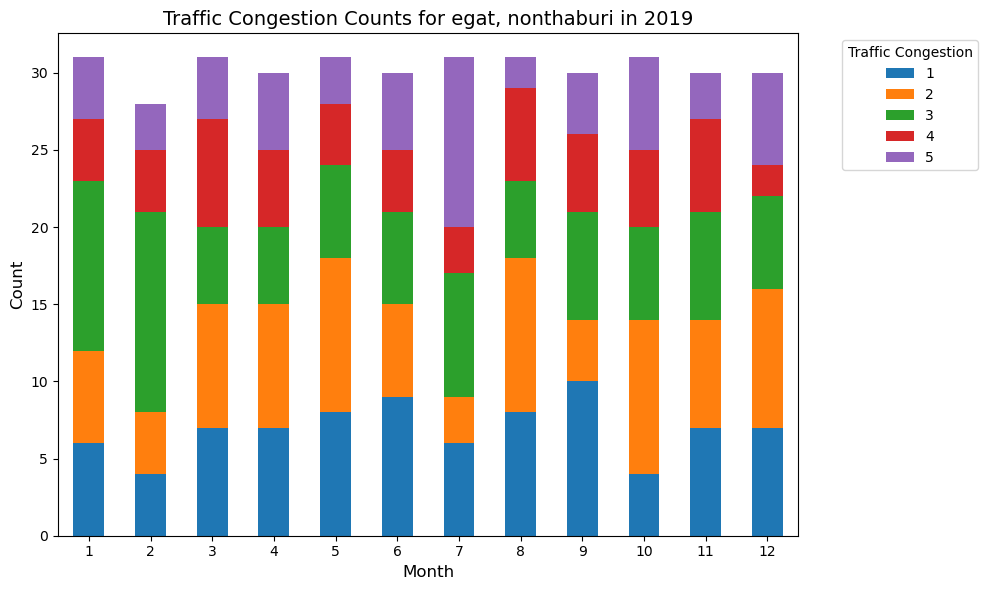

In [43]:
desired_location = 'egat, nonthaburi'  # Replace with the actual location name
desired_year = 2019  # Replace with the desired year

# Filter the dataframe for the specified location and year
filtered_data = pivot_df[
    (pivot_df['location'] == desired_location) & (pivot_df['year'] == desired_year)
]

# Set 'month' as the index for plotting
filtered_data.set_index('month', inplace=True)

# Drop the non-numeric columns ('location' and 'year') for plotting
filtered_data = filtered_data.drop(columns=['location', 'year'])

# Plot the stacked bar graph
filtered_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add title and labels
plt.title(f'Traffic Congestion Counts for {desired_location} in {desired_year}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(len(filtered_data.index)), labels=filtered_data.index, rotation=0)
plt.legend(title='Traffic Congestion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
pivot_csv = pd.read_csv('pivot_df.csv')

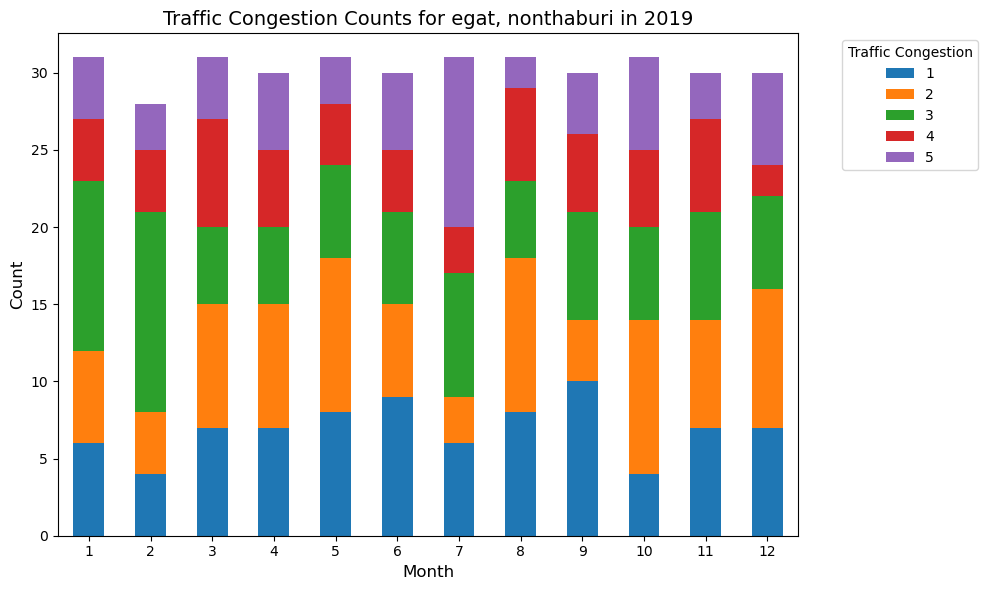

In [46]:
desired_location = 'egat, nonthaburi'  # Replace with the actual location name
desired_year = 2019  # Replace with the desired year

# Filter the dataframe for the specified location and year
filtered_data = pivot_csv[
    (pivot_csv['location'] == desired_location) & (pivot_csv['year'] == desired_year)
]

# Set 'month' as the index for plotting
filtered_data.set_index('month', inplace=True)

# Drop the non-numeric columns ('location' and 'year') for plotting
filtered_data = filtered_data.drop(columns=['location', 'year'])

# Plot the stacked bar graph
filtered_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add title and labels
plt.title(f'Traffic Congestion Counts for {desired_location} in {desired_year}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(len(filtered_data.index)), labels=filtered_data.index, rotation=0)
plt.legend(title='Traffic Congestion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()